+ ### Load hourly data

In [2]:
import csv
import pandas as pd
data = pd.read_csv('./final/data.csv')
data['Hour'] = pd.to_datetime(data['Hour'])

# 获取时间列作为索引
x = data['Hour'].dt.to_pydatetime().tolist()
# x = x[6648:6648+5880]
# x = x[312:672]
x_Hour = x
print(x_Hour[0:10])
# print(x_Hour[0:10])
# period = 54635
freq = 'H'
import matplotlib.pylab as plt

# amount
NonceSum=data['NonceSum']
ValueSum=data['value']
# GasPriceSum,GasUsedSum,CumulativeUsedSum,ConfirmationsSum,hash,from,to
GasSum=data['GasSum']
GasPriceSum=data['GasPriceMean']
GasUsedSum=data['GasUsedSum']
# GasPriceUsedSum=data['GasPriceUsedSum']
hash=data['hash']
From=data['from']
To=data['to']
ConfirmationsSum=data['ConfirmationsSum']
CumulativeUsedSum=data['CumulativeUsedSum']
# TokenNameCount,CarbonValueSum,From,To,ValueSum
# print(ValueSum.head())
# deposit_tx_count = df['']
# redeem_tx_count = df['redeem_tx_count']
# bal_tx_count = stake_tx_count - unstake_tx_count + deposit_tx_count - redeem_tx_count

# # of unique addresses


[datetime.datetime(2020, 9, 29, 21, 0), datetime.datetime(2020, 9, 29, 22, 0), datetime.datetime(2020, 9, 30, 5, 0), datetime.datetime(2020, 9, 30, 6, 0), datetime.datetime(2020, 9, 30, 11, 0), datetime.datetime(2020, 9, 30, 12, 0), datetime.datetime(2020, 9, 30, 13, 0), datetime.datetime(2020, 9, 30, 16, 0), datetime.datetime(2020, 9, 30, 21, 0), datetime.datetime(2020, 9, 30, 22, 0)]


+ ### Show time series of features

6924      126.144948
6925     2647.600000
6926        0.789725
6927        1.106448
6928        0.136626
            ...     
12377    3390.988470
12378    1626.919717
12379    1351.306266
12380      10.000000
12381       3.902310
Name: value, Length: 5458, dtype: float64


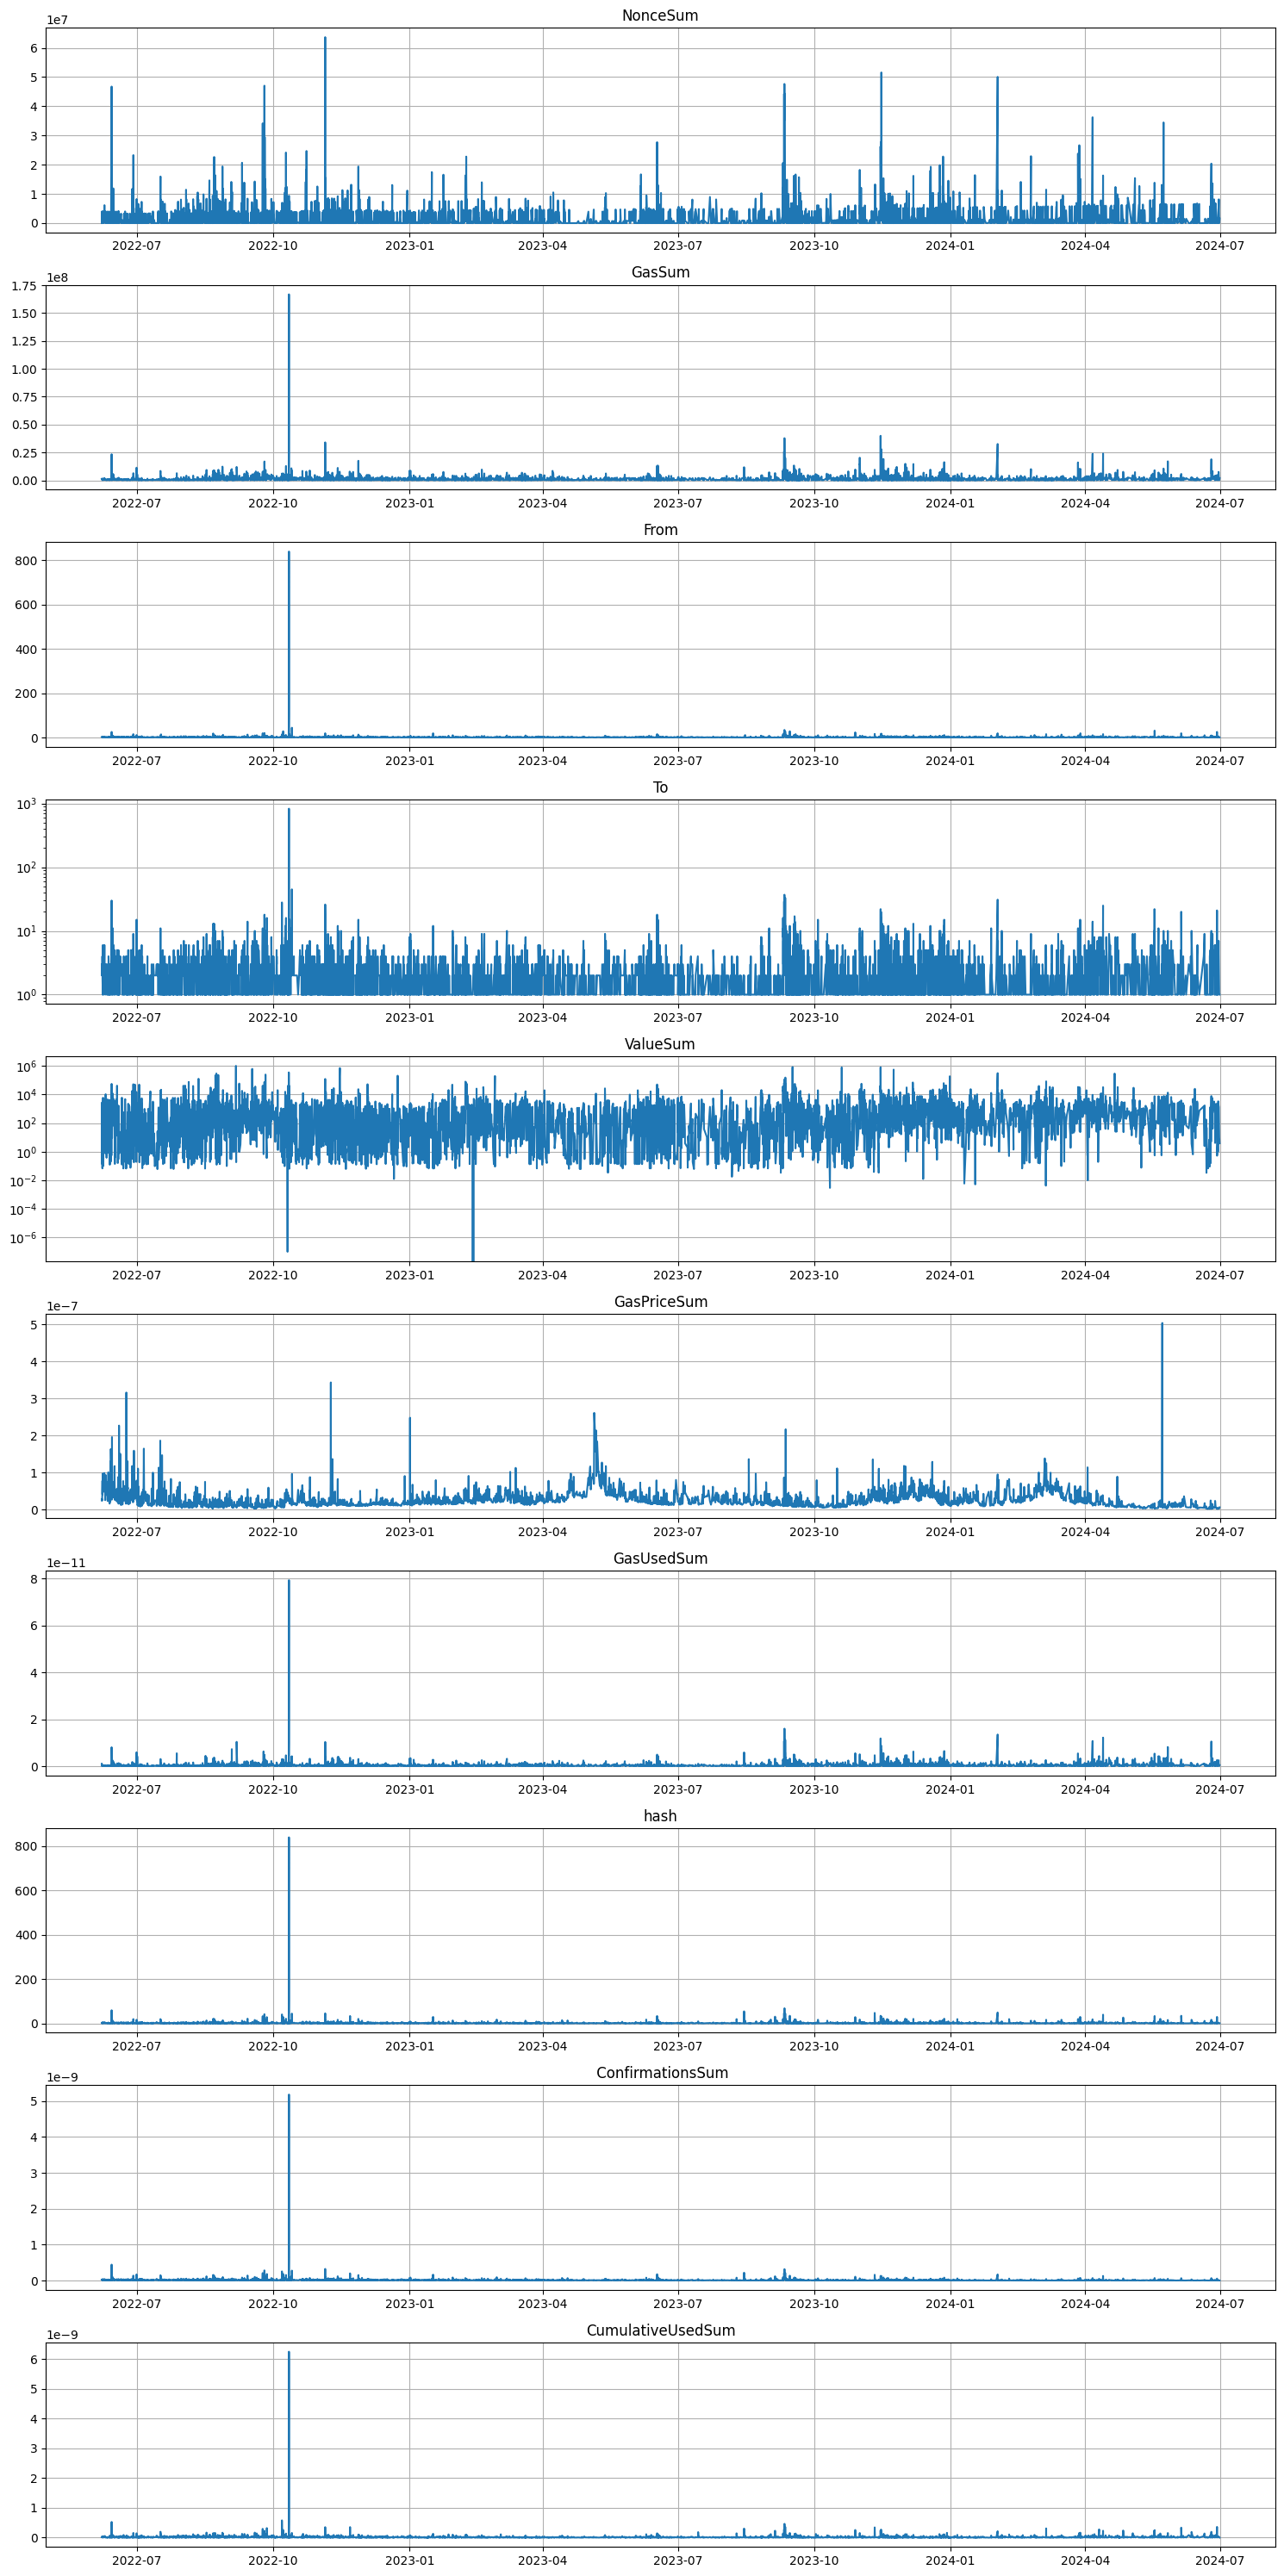

In [3]:
import matplotlib.pyplot as plt
from datetime import datetime

# # 定义开始和结束日期
start = '2022-06-07 04:00:00'
# 2022-06-07 04:00:00
end = '2024-07-01 00:00:00'

# 找到开始和结束日期在时间戳列表中的索引
i_s = x_Hour.index(datetime.fromisoformat(start))
i_e = x_Hour.index(datetime.fromisoformat(end))
# i_s = 1
# i_e = 5880
# 创建一个5行1列的子图布局
fig, axs = plt.subplots(10, 1, sharex=False, figsize=(15, 30))

# 绘制第一个子图，TokenNameCount的金额
axs[0].plot(x_Hour[i_s:i_e], NonceSum[i_s:i_e], label='stake')
axs[0].set_title('NonceSum')
axs[0].grid()

# 绘制第二个子图，CarbonValueSum的金额
axs[1].plot(x_Hour[i_s:i_e], GasSum[i_s:i_e], label='unstake')
axs[1].set_title('GasSum')
axs[1].grid()

# 绘制第三个子图，From的金额
axs[2].plot(x_Hour[i_s:i_e], From[i_s:i_e], label='deposit')
axs[2].set_title('From')
axs[2].grid()

# 绘制第四个子图，To的金额
axs[3].plot(x_Hour[i_s:i_e], To[i_s:i_e], label='redeem')
axs[3].set_title('To')
axs[3].set_yscale('log')
axs[3].grid()

# 绘制第五个子图，ValueSum的数量
axs[4].plot(x_Hour[i_s:i_e], ValueSum[i_s:i_e], label='stake')
print(ValueSum[i_s:i_e])
axs[4].set_yscale('log')
axs[4].set_title('ValueSum')
axs[4].grid()

axs[5].plot(x_Hour[i_s: i_e],GasPriceSum[i_s:i_e], label='GasPriceSum')
axs[5].set_title('GasPriceSum')
axs[5].grid()

axs[6].plot(x_Hour[i_s: i_e],GasUsedSum[i_s:i_e], label='GasUsedSum')
axs[6].set_title('GasUsedSum')
axs[6].grid()   

axs[7].plot(x_Hour[i_s: i_e],hash[i_s:i_e], label='GasUsedSum')
axs[7].set_title('hash')
axs[7].grid()   

axs[8].plot(x_Hour[i_s: i_e ],   ConfirmationsSum[i_s:i_e], label='ConfirmationsSum')
axs[8].set_title(' ConfirmationsSum')
axs[8].grid()
axs[9].plot(     x_Hour[i_s: i_e], CumulativeUsedSum[i_s:i_e], label='CumulativeUsedSum')
axs[9].set_title('CumulativeUsedSum')
axs[9].grid()
# 显示图形
plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域。
plt.show()


+ ### Show detected anomaly cases

In [4]:
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

def show_case(start, end, a_s, a_e, filename, show_hour=False):
    plt.rc('axes', titlesize=30)
    plt.rc('xtick', labelsize=20)
    plt.rc('ytick', labelsize=20)
    fig, axs = plt.subplots(5, 2, sharex=False, figsize=(30, 18), constrained_layout=True)

    i_s = x_Hour.index(datetime.fromisoformat(start))
    i_e = x_Hour.index(datetime.fromisoformat(end))
    print(i_s, i_e)

    arrays = [
        [NonceSum, GasSum, From, To, ValueSum],
        [GasPriceSum, GasUsedSum, hash, ConfirmationsSum, CumulativeUsedSum]
    ]
    
    titles = [
        ['NonceSum', 'GasSum', 'From', 'To', 'ValueSum'],
        ['GasPriceSum', 'GasUsedSum', 'hash', 'ConfirmationsSum', 'CumulativeUsedSum']
    ]
    
    dateFmt = mdates.DateFormatter('%y-%m-%d')
    print(a_s, a_e)
    for i in range(5):
        for j in range(2):
            axs[i][j].axvspan(a_s, a_e, facecolor='red', alpha=0.3)
            axs[i][j].tick_params('x', labelrotation=45)
            axs[i][j].grid()
            axs[i][j].plot(x_Hour[i_s:i_e], arrays[j][i][i_s:i_e])
            axs[i][j].set_title(titles[j][i])
            if not show_hour: 
                axs[i][j].xaxis.set_major_formatter(dateFmt)

    plt.savefig(filename, dpi=600)


**Case 1**

7883 8205
2022-10-11 10:30:00 2022-10-11 14:30:00


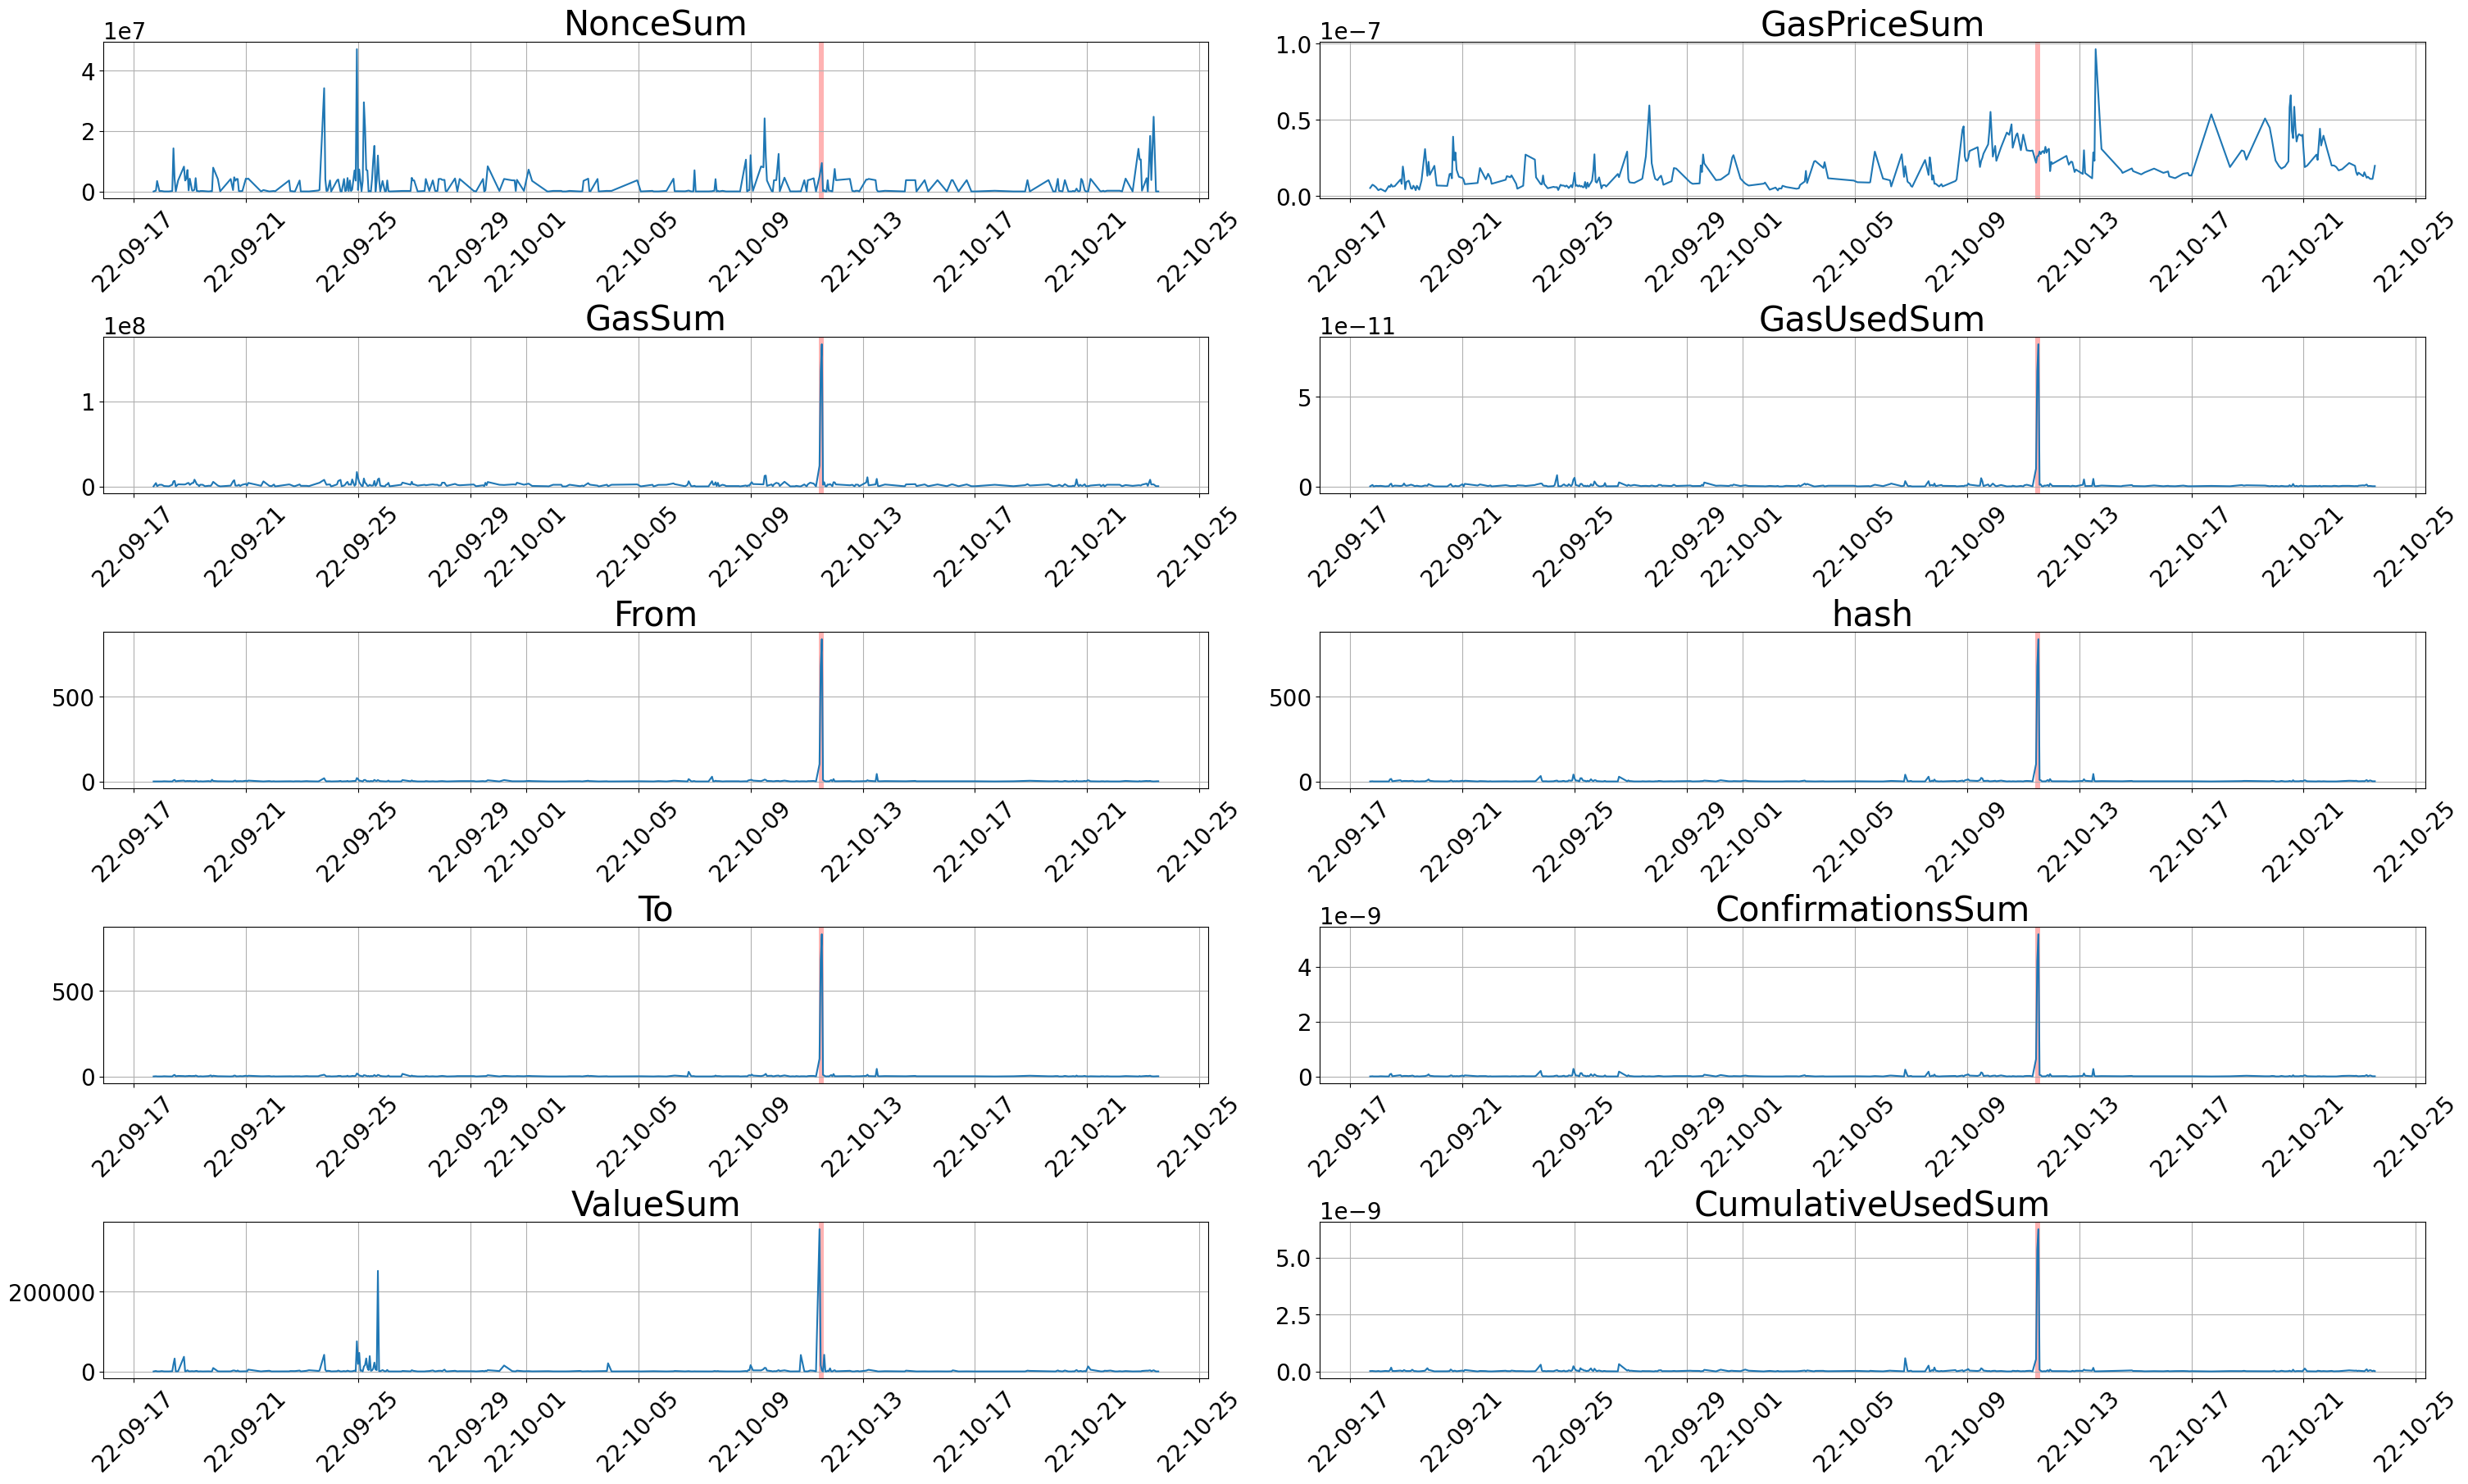

In [10]:
start = '2022-09-17 17:00:00'
end = '2022-10-23 14:00:00'
# 2022-10-11 13:00:00
# 2021-03-10 09:00:00
a_s = datetime(2022, 10, 11, 10, 30)
a_e = datetime(2022, 10, 11, 14, 30)

show_case(start, end, a_s, a_e, 'case1.png')

**Case 2**

10646 10926
2023-11-14 19:00:00 2023-11-14 23:59:00


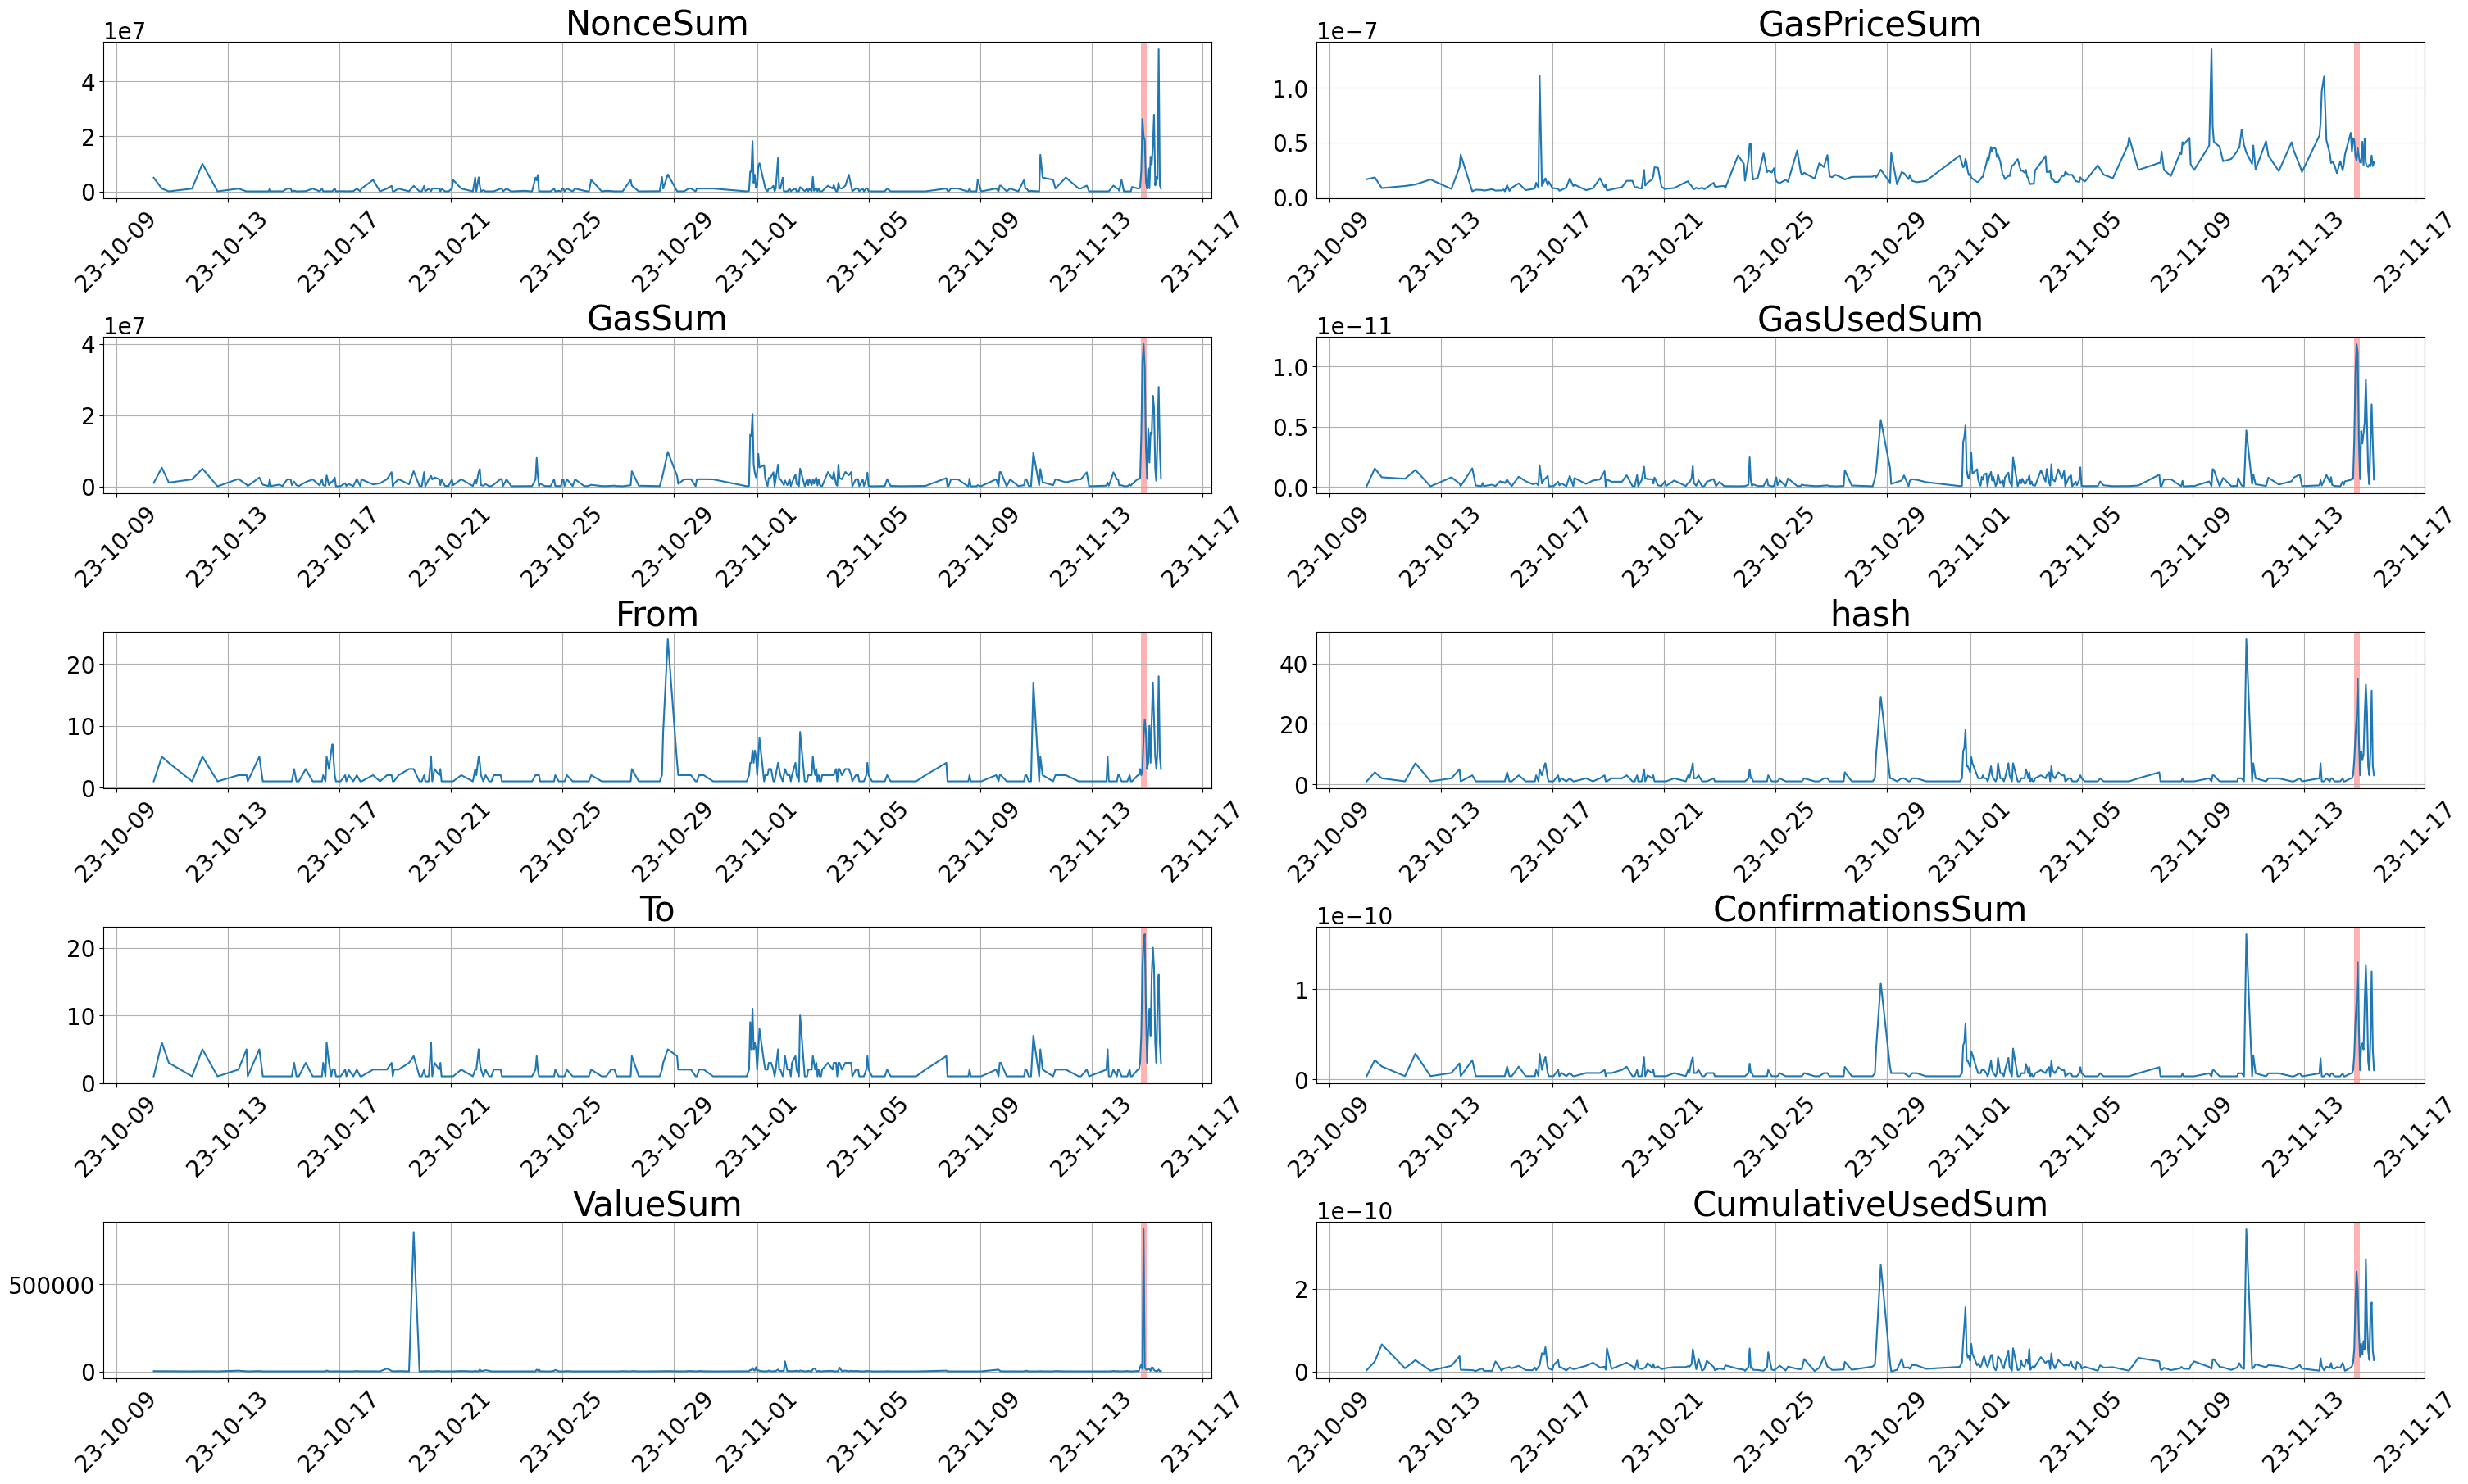

In [69]:
start = '2023-10-10 08:00:00'
end = '2023-11-15 13:00:00'
# 2023-12-31 23:00:00
# 2023-11-14 20:00:00
a_s = datetime(2023, 11, 14, 19, 0)
a_e = datetime(2023, 11, 14, 23, 59)

show_case(start, end, a_s, a_e, 'case2.png')

**Case 3**

6648 6859
2022-05-11 10:00:00 2022-05-11 14:00:00


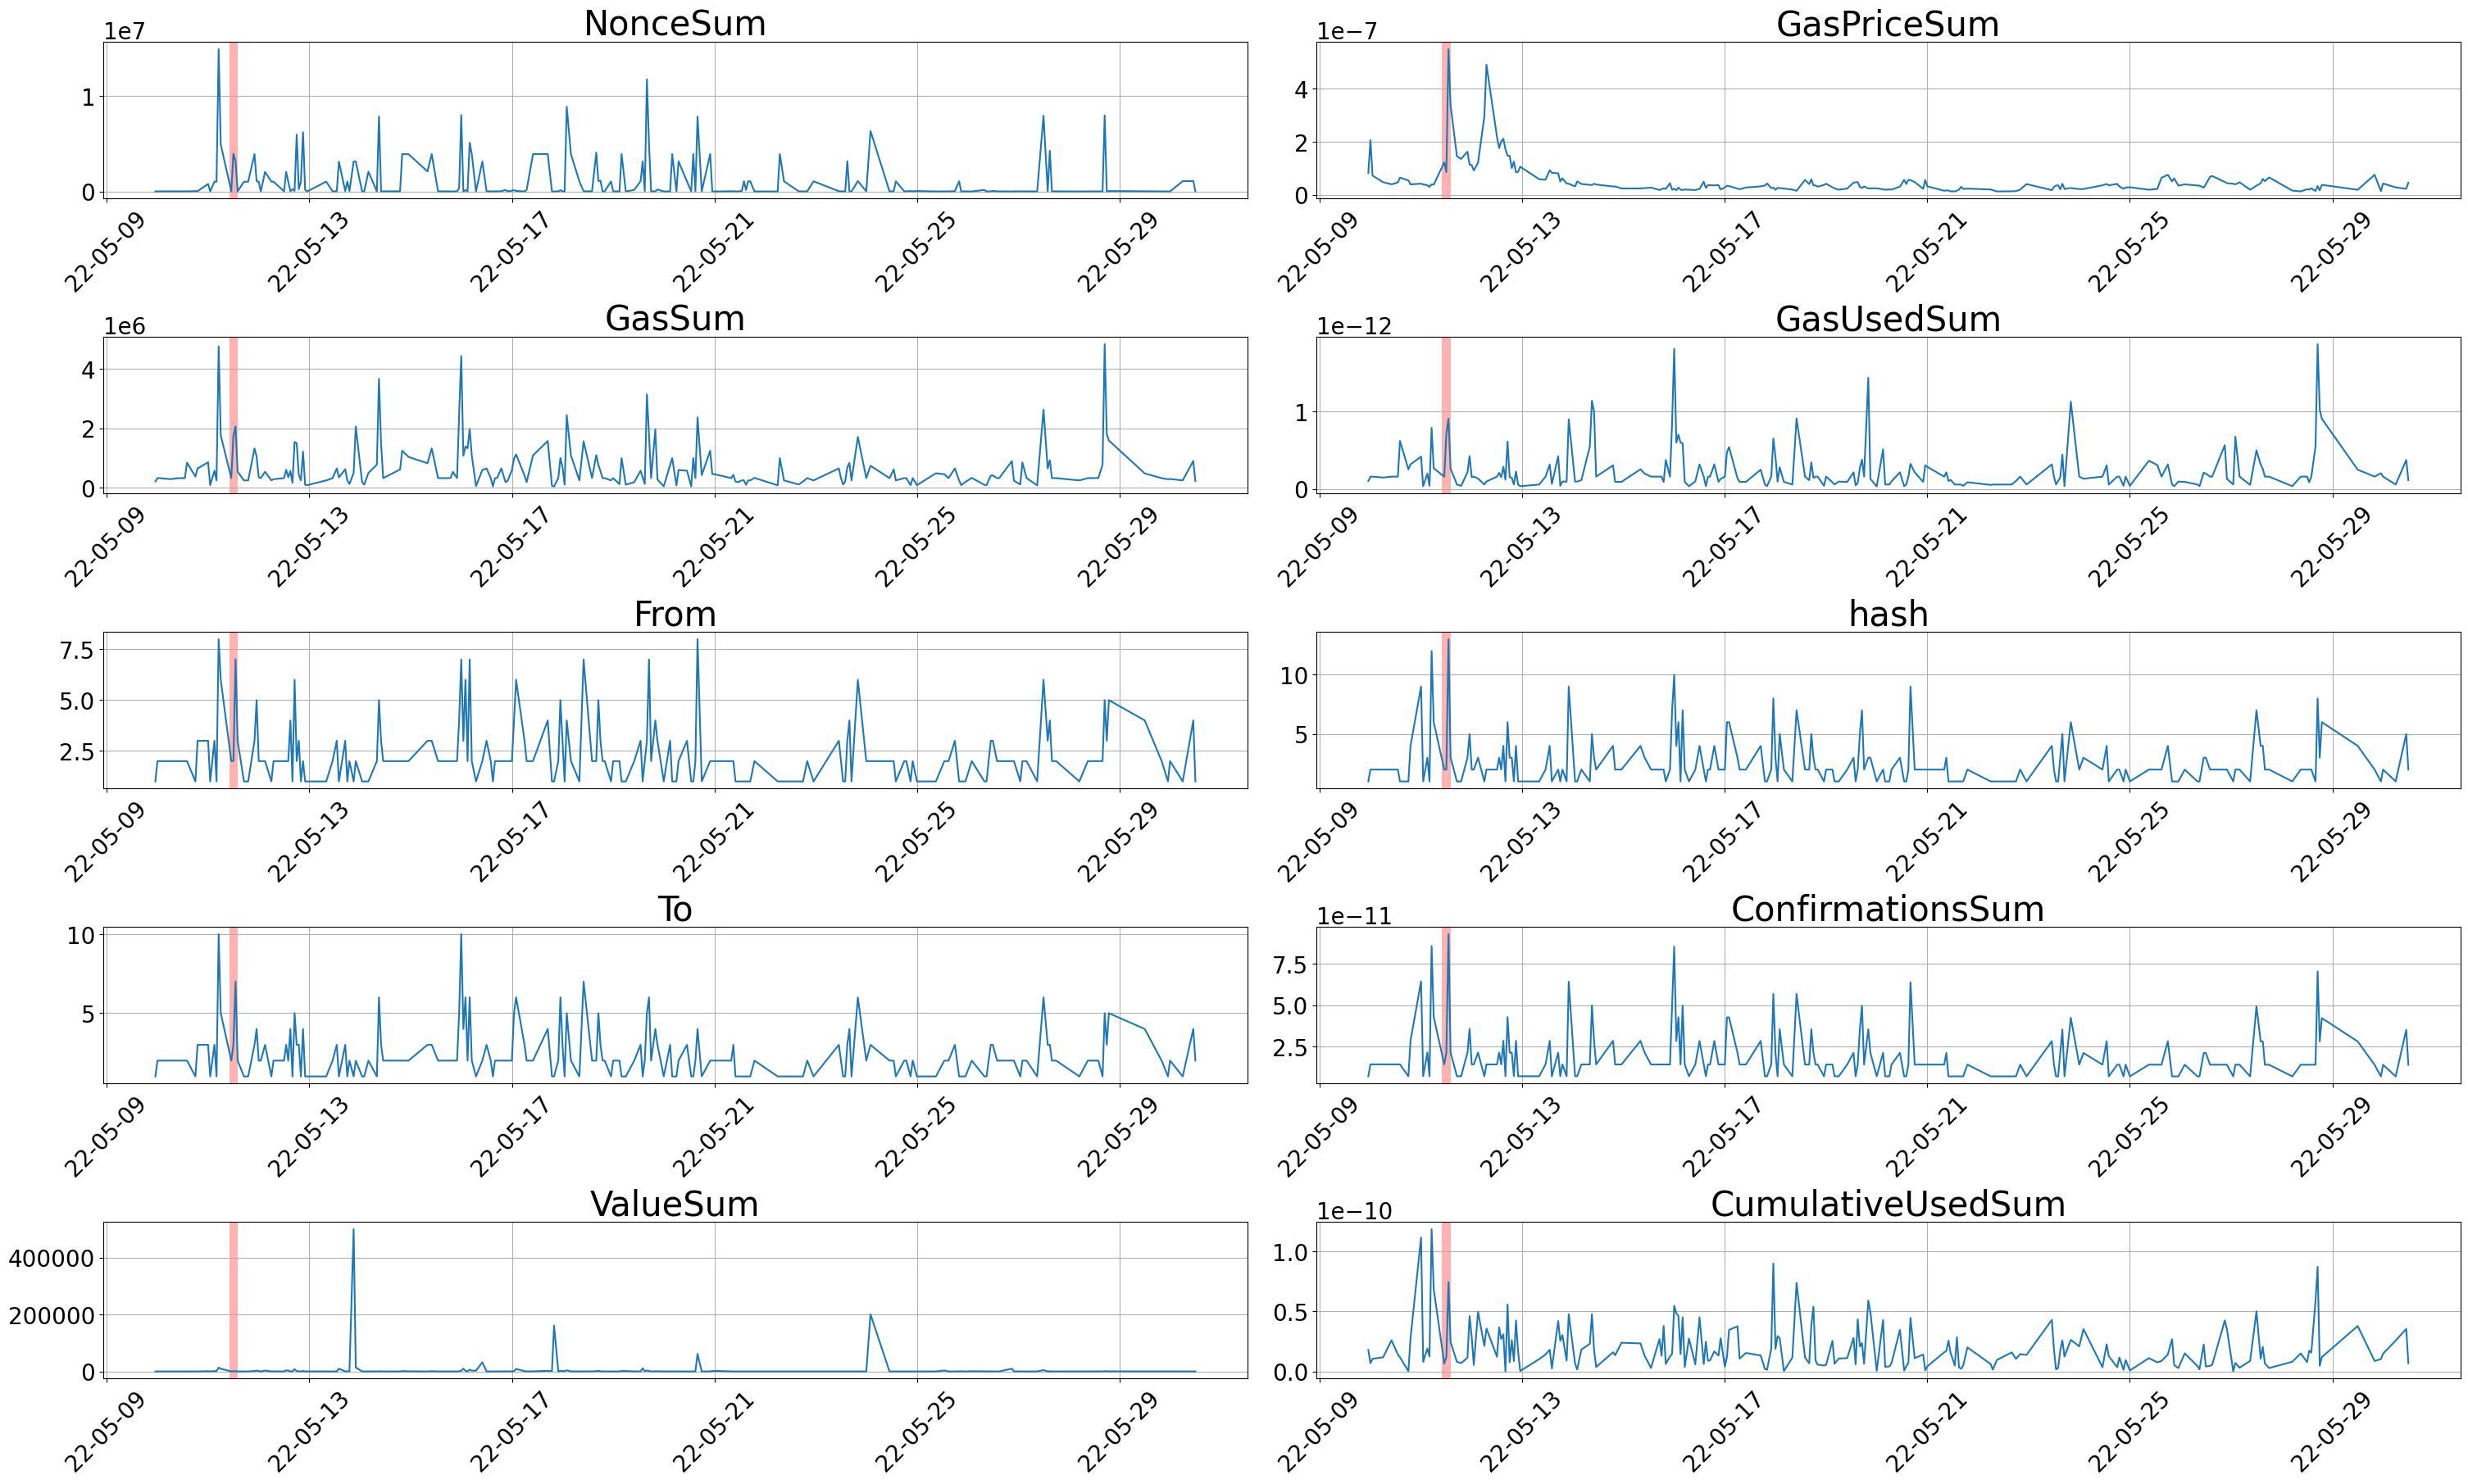

In [70]:
start ='2022-05-09 23:00:00'
end = '2022-05-30 13:00:00'

a_s = datetime(2022, 5, 11, 10, 00)
a_e = datetime(2022, 5, 11, 14, 00)

show_case(start, end, a_s, a_e, 'case3.png')

**Case 4**

8028 8256
2022-10-11 10:00:00 2022-10-11 12:50:00


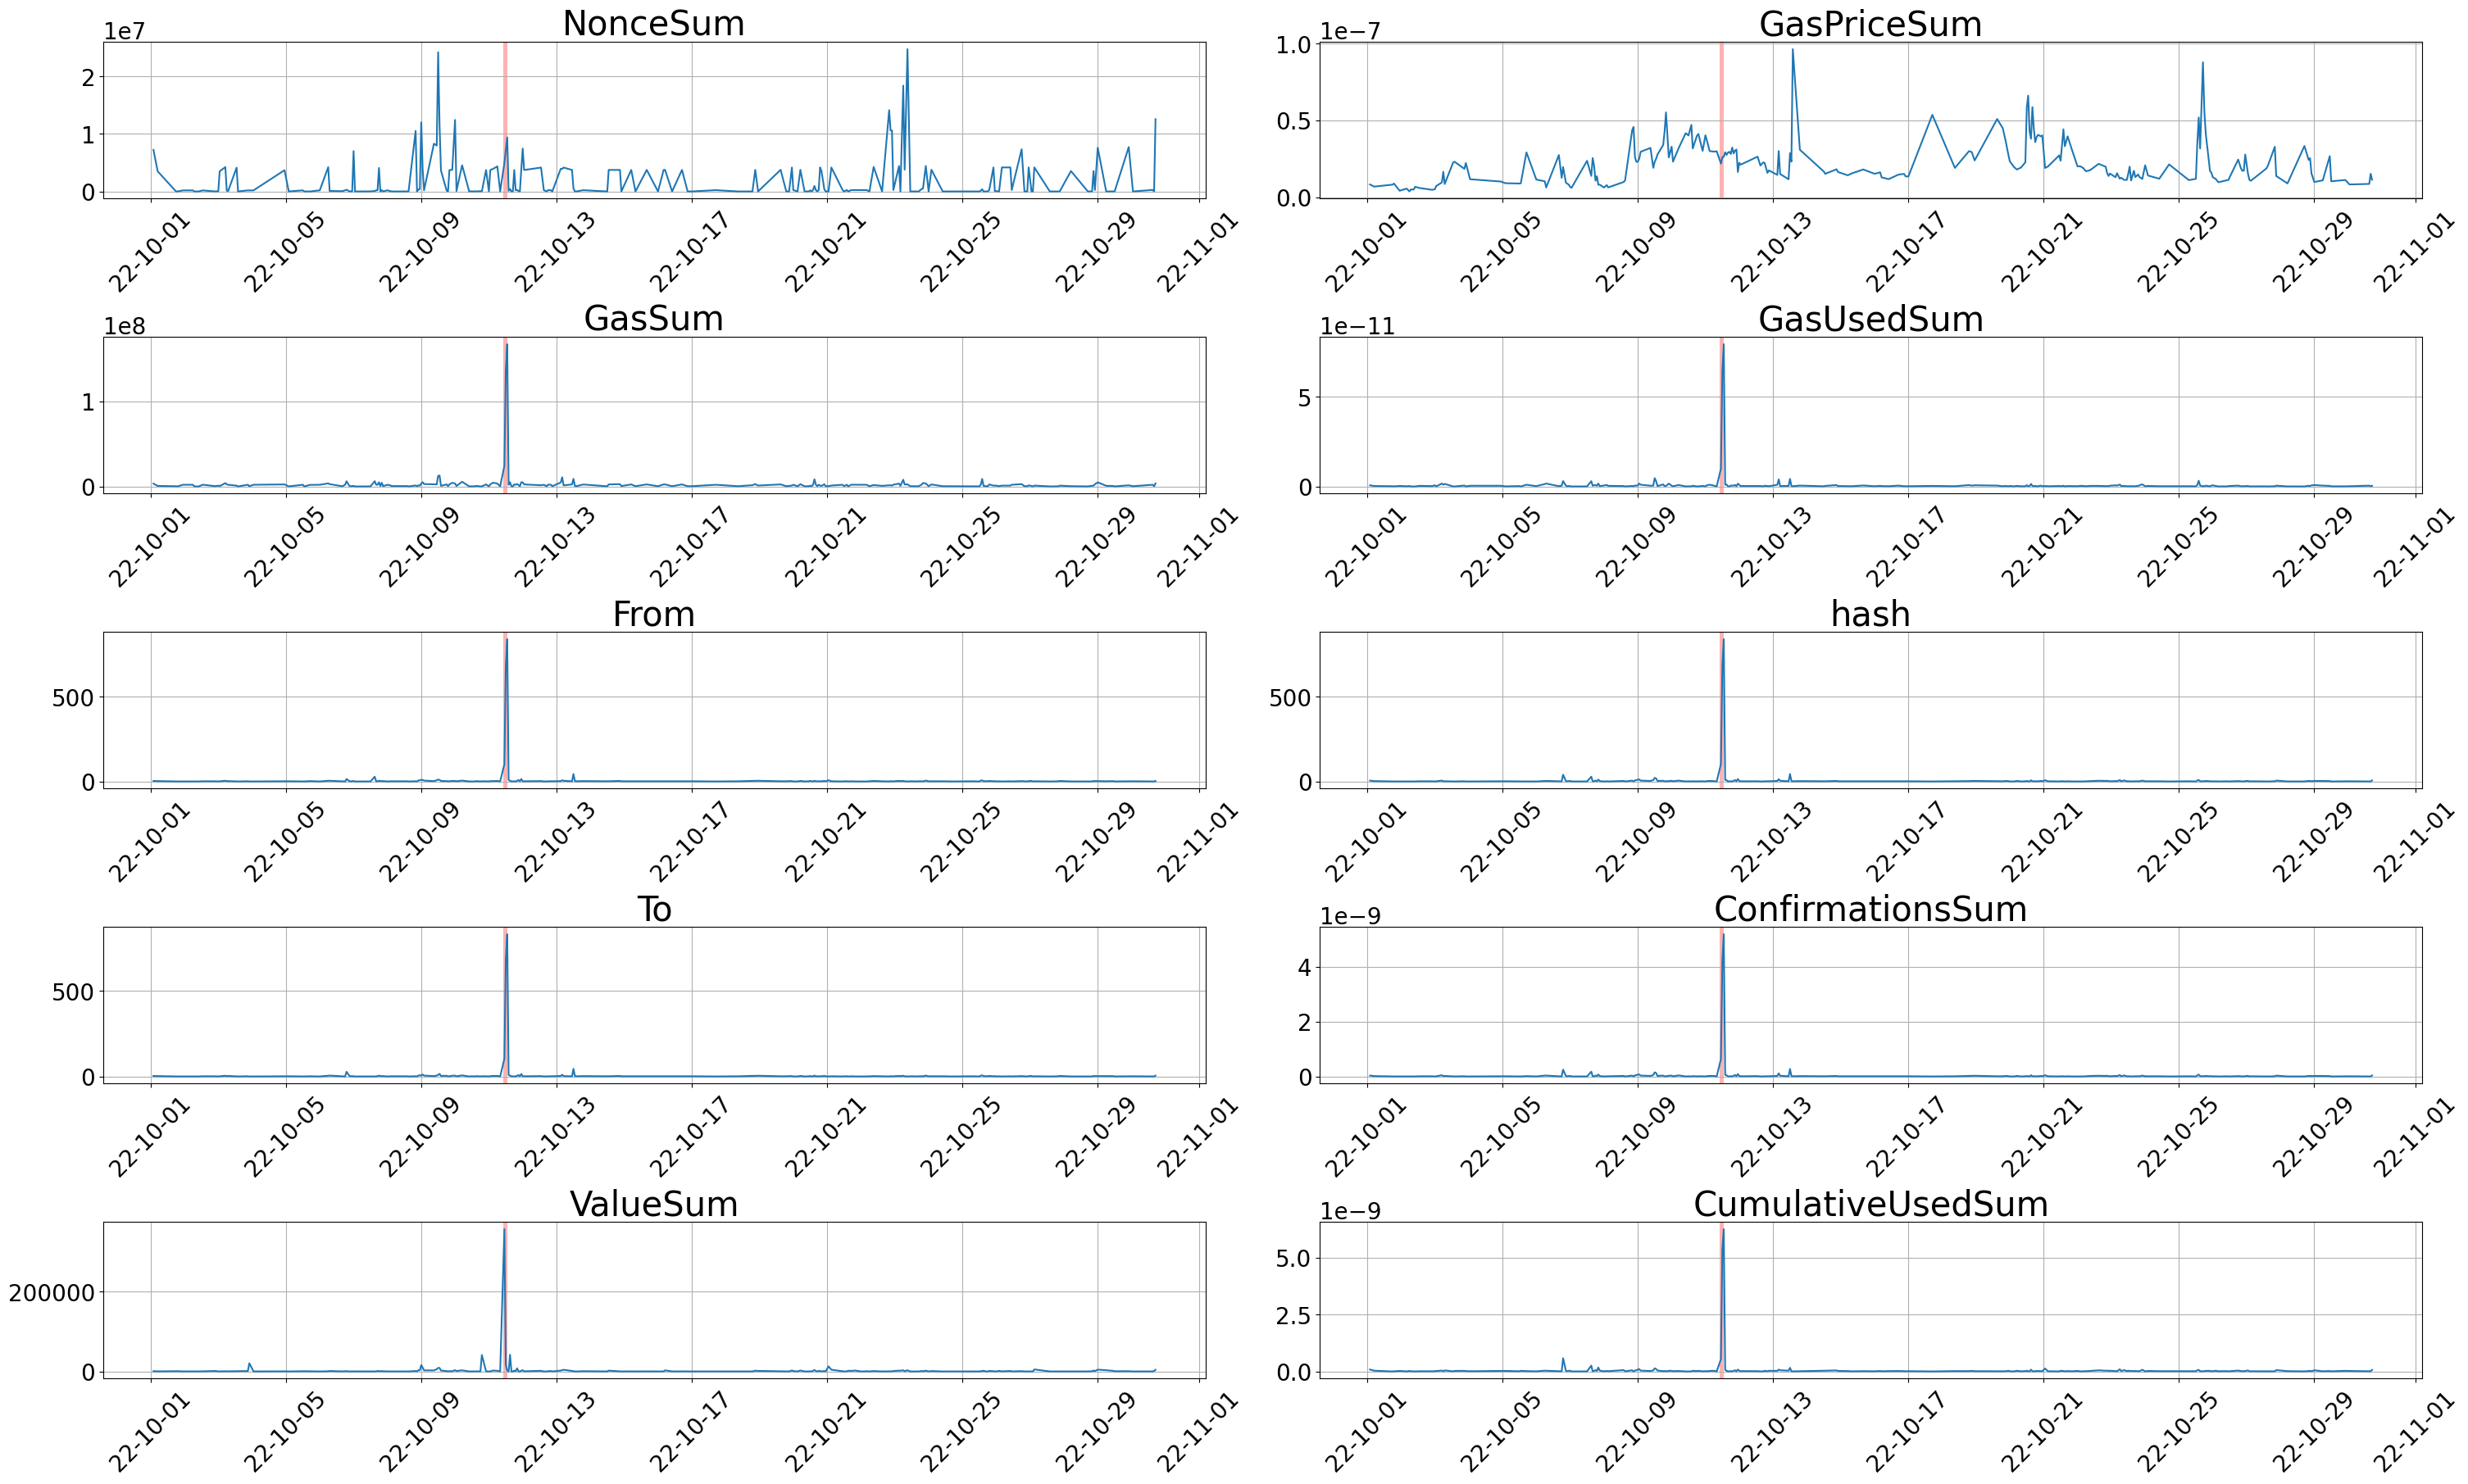

In [71]:
start = '2022-10-01 02:00:00'
end = '2022-10-30 19:00:00'

a_s = datetime(2022, 10, 11, 10, 00)
a_e = datetime(2022, 10, 11, 12, 50)

show_case(start, end, a_s, a_e, 'case4.png')